# Гипергеометрическое распределение

### Создадим массив с объёмами реализаций выборок

In [1]:
volumes = [5, 10, 100, 1000, 10**5]

In [2]:
count_samples = 5

### Зададим гипергеометрическое распределение $HG(200, 70, 10)$ используя модуль Scipy [1] и выведём первые 2 реализации выборки

In [3]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
N, M, n = (200, 70, 10)
hg = hypergeom(N, n, M)

In [4]:
data = {v: np.array([hg.rvs(size=v) for _ in range(count_samples)]) for v in volumes}

In [5]:
print(data[5])

[[4 5 2 5 3]
 [4 1 4 2 3]
 [3 1 2 5 6]
 [6 7 4 4 4]
 [6 2 5 3 3]]


In [6]:
print(data[10])

[[1 3 5 4 4 2 6 1 5 1]
 [7 3 1 6 4 6 4 3 1 2]
 [3 5 0 3 3 7 6 1 2 2]
 [2 3 4 3 2 4 2 4 4 1]
 [4 3 2 1 3 3 2 2 4 3]]


### Построение эмипирической фунции распределения

In [7]:
def ecdf(x, data):
    return data[data<=x].size / data.size

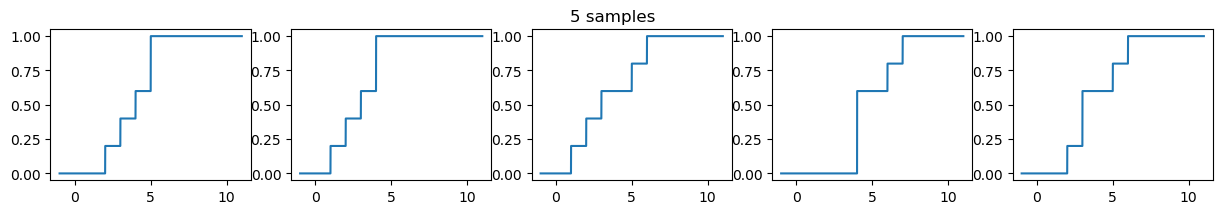

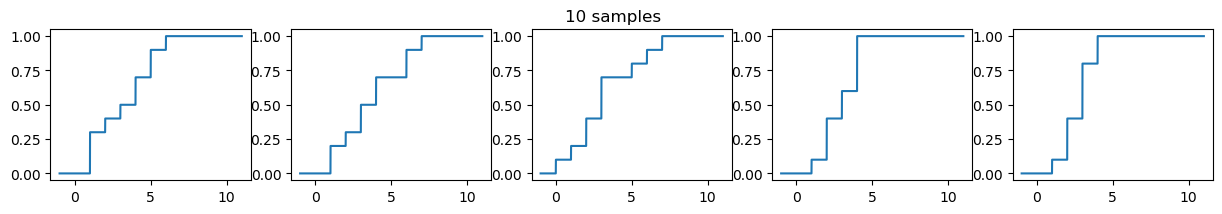

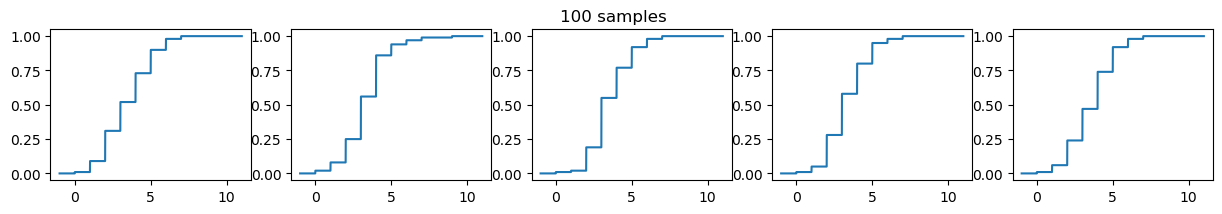

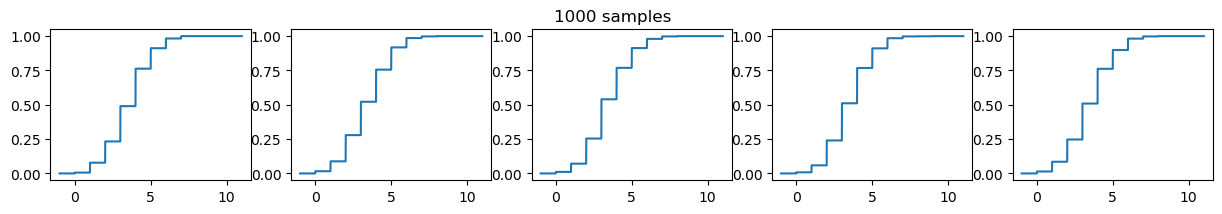

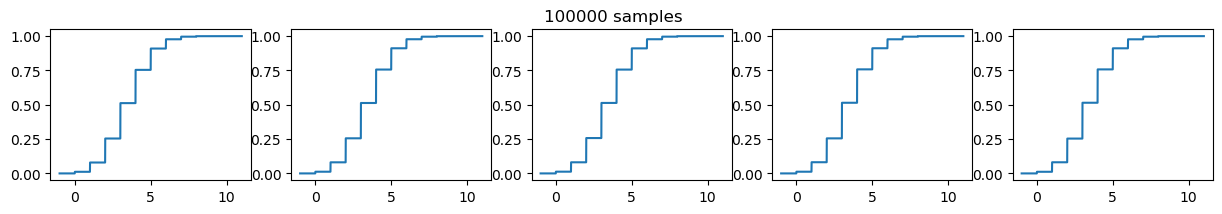

In [8]:
x = np.arange(-1,11, 0.001)
for volume in data:
    fig, ax = plt.subplots(1, 5, figsize=(15, 2), dpi=100)
    fig.suptitle(f"{volume} samples")
    for i in range(len(volumes)):
        y = list(map(lambda e: ecdf(e, data[volume][i]) , x))
        ax[i].plot(x, y)

### Расчёт верхнтх границ разностей каждой пары эмпирических функций распределения

In [10]:
for volume in data:
    for i in range(len(data[volume])-1):
        for j in range(i+1, len(data[volume])):
            xx = np.arange(-1,11, 0.001)
            print(f"{volume:10} samples, sup|F_{i+1} - F_{j+1}| = {max(list(map(lambda x: abs(ecdf(x,data[volume][i])-ecdf(x,data[volume][j])), xx)))}")

         5 samples, sup|F_1 - F_2| = 0.4
         5 samples, sup|F_1 - F_3| = 0.2
         5 samples, sup|F_1 - F_4| = 0.4
         5 samples, sup|F_1 - F_5| = 0.19999999999999996
         5 samples, sup|F_2 - F_3| = 0.4
         5 samples, sup|F_2 - F_4| = 0.6
         5 samples, sup|F_2 - F_5| = 0.4
         5 samples, sup|F_3 - F_4| = 0.6
         5 samples, sup|F_3 - F_5| = 0.2
         5 samples, sup|F_4 - F_5| = 0.6
        10 samples, sup|F_1 - F_2| = 0.20000000000000007
        10 samples, sup|F_1 - F_3| = 0.19999999999999996
        10 samples, sup|F_1 - F_4| = 0.30000000000000004
        10 samples, sup|F_1 - F_5| = 0.30000000000000004
        10 samples, sup|F_2 - F_3| = 0.19999999999999996
        10 samples, sup|F_2 - F_4| = 0.30000000000000004
        10 samples, sup|F_2 - F_5| = 0.30000000000000004
        10 samples, sup|F_3 - F_4| = 0.30000000000000004
        10 samples, sup|F_3 - F_5| = 0.30000000000000004
        10 samples, sup|F_4 - F_5| = 0.20000000000000007
    

### Построение вариациооного ряда и поиск квантилей

In [11]:
alphas = [0.1, 0.5, 0.7]

In [12]:
var = {key: np.array([(sorted(v)) for v in value]) for key, value in data.items()}
print(var[5])

[[2 3 4 5 5]
 [1 2 3 4 4]
 [1 2 3 5 6]
 [4 4 4 6 7]
 [2 3 3 5 6]]


In [13]:
print(var[10])

[[1 1 1 2 3 4 4 5 5 6]
 [1 1 2 3 3 4 4 6 6 7]
 [0 1 2 2 3 3 3 5 6 7]
 [1 2 2 2 3 3 4 4 4 4]
 [1 2 2 2 3 3 3 3 4 4]]


In [15]:
for a in alphas:
    print(f"α={a}")
    for key, samples in var.items():
        x_alphas = []
        for sample in samples:
            x_alphas += [sample[int(a*len(sample) + 1)]]
            print(f"{key:6} samples, x_α={x_alphas[-1]}")
        print()
    print()

α=0.1
     5 samples, x_α=3
     5 samples, x_α=2
     5 samples, x_α=2
     5 samples, x_α=4
     5 samples, x_α=3

    10 samples, x_α=1
    10 samples, x_α=2
    10 samples, x_α=2
    10 samples, x_α=2
    10 samples, x_α=2

   100 samples, x_α=2
   100 samples, x_α=2
   100 samples, x_α=2
   100 samples, x_α=2
   100 samples, x_α=2

  1000 samples, x_α=2
  1000 samples, x_α=2
  1000 samples, x_α=2
  1000 samples, x_α=2
  1000 samples, x_α=2

100000 samples, x_α=2
100000 samples, x_α=2
100000 samples, x_α=2
100000 samples, x_α=2
100000 samples, x_α=2


α=0.5
     5 samples, x_α=5
     5 samples, x_α=4
     5 samples, x_α=5
     5 samples, x_α=6
     5 samples, x_α=5

    10 samples, x_α=4
    10 samples, x_α=4
    10 samples, x_α=3
    10 samples, x_α=4
    10 samples, x_α=3

   100 samples, x_α=3
   100 samples, x_α=3
   100 samples, x_α=3
   100 samples, x_α=3
   100 samples, x_α=4

  1000 samples, x_α=4
  1000 samples, x_α=3
  1000 samples, x_α=3
  1000 samples, x_α=3
  1000 samp

### Проверка реального значения квантиля

In [16]:
def compute_quntile(cdf, a, eps=0.001):
    x = np.arange(-1, 13, eps)
    for xx in x:
        if cdf(xx)<a and cdf(xx+eps)>a:
            return int(xx+eps)

for a in alphas:
    x = np.arange(-1, 13, 0.001)
    print(f"α={a}, x_α={compute_quntile(hg.cdf, a)}")

α=0.1, x_α=2
α=0.5, x_α=3
α=0.7, x_α=4


### Построение гистограммы частот, полигона частот и сравнение значений с функцией распределения

Красная линия - линия полигона частот, жёлтая - функция распределения

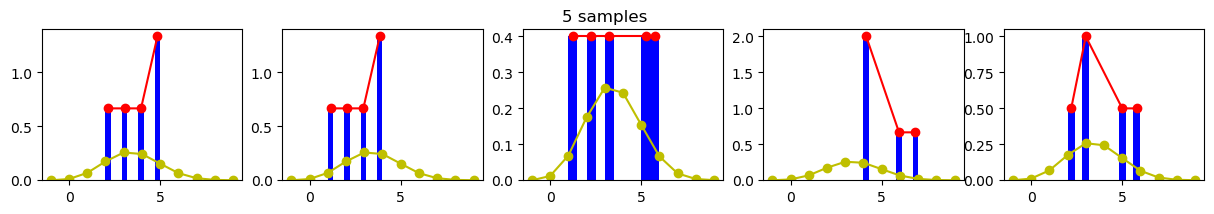

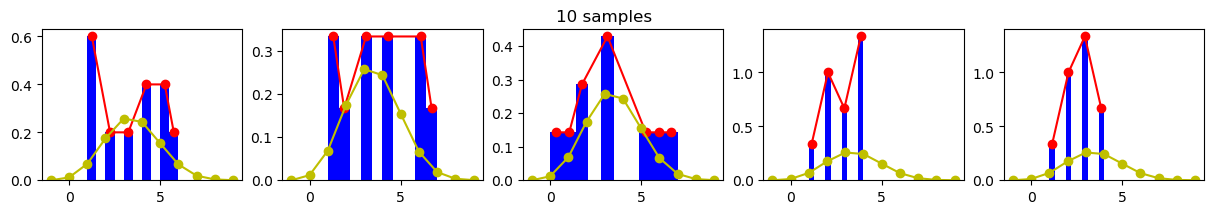

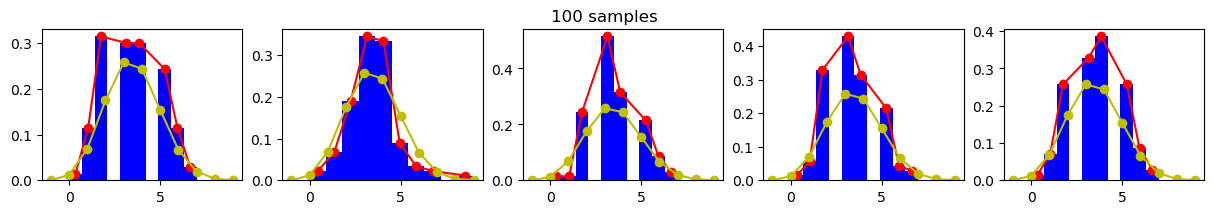

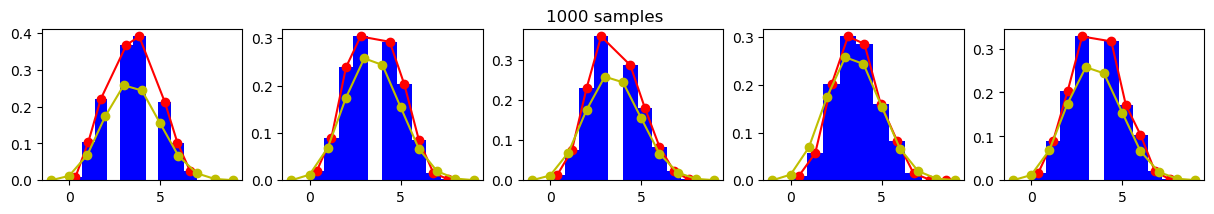

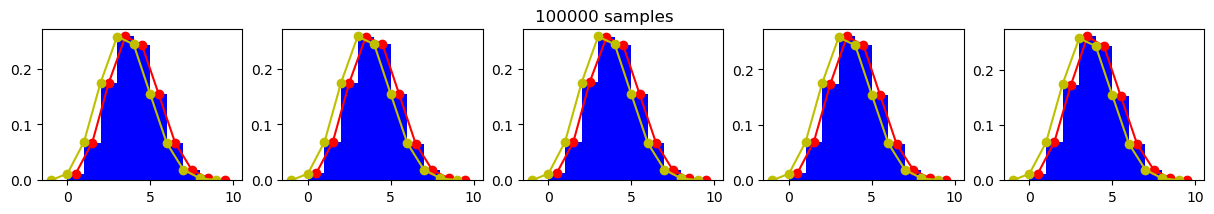

In [17]:
for volume in data:
    fig, ax = plt.subplots(1, 5, figsize=(15, 2), dpi=100)
    fig.suptitle(f"{volume} samples")
    for i in range(len(volumes)):
        counts, bins = np.histogram(data[volume][i])
        ns, bns, _ = ax[i].hist(bins[:-1], bins=bins, weights=counts, density=True, color="b")
        bns = np.array(bns)
        x = bns[:-1] + (bns[1:] - bns[:-1])/2
        x = [x[i] for i in range(len(ns))  if ns[i]!=0 ]
        y = [ns[i] for i in range(len(ns))  if ns[i]!=0 ]
        ax[i].plot(x, y, "-ro")
        x = np.arange(-1, n)
        pmf = hg.pmf(x)
        ax[i].plot(x, pmf, '-yo')
        ax[i].plot   

# Гамма распределение


### Создадим массив с объёмами реализаций выборок

In [18]:
volumes = [5, 10, 100, 1000, 10**5]

In [19]:
count_samples = 5

### Зададим Гамма распределение $Г(2, 1/2)$ используя модуль Scipy и выведём первые 2 реализации выборки

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma
%matplotlib inline

a, th = 2, 1/2 
g = gamma(a, scale=1/th)

In [21]:
data = {v: np.array([g.rvs(size=v) for _ in range(count_samples)]) for v in volumes}

In [22]:
print(data[5])

[[ 0.21458197  2.15967123  2.42826354  2.99277131  4.88650833]
 [ 2.47716438  9.50444     2.03889844  5.33830456  0.46371415]
 [ 3.89402852  2.97116322  0.82724113  8.94799453  3.0218157 ]
 [ 3.08048718 10.57175782  3.92071664  3.36739826  0.36990768]
 [ 3.51386672  2.71127769  0.71009743  3.75135815  3.55897453]]


In [23]:
print(data[10])

[[ 4.08636189  2.12448904  5.84417023  1.78619904  3.69859107  1.46989451
   8.07049354  3.74786129  1.57544825  5.60238847]
 [ 3.35279524  7.04591535  3.91664963  0.60566861  1.57300945  1.53704991
   1.53015247  3.02820937  2.71134182  1.16260742]
 [ 1.65957986  2.97594705  3.57547827  1.5545393   4.01169167  3.78654759
   4.08953129  1.14409025  2.55354043  2.0196425 ]
 [ 3.10011909  5.26278858  2.31987952  4.29776845  1.74983957  8.84837562
   7.24379634  1.72018998  1.38216958  1.28455959]
 [ 6.14043228 11.62250597  1.24124768  4.87797682  6.73557887  4.08916343
   7.03642169  4.26696835  0.97195753  5.4456575 ]]


### Построение эмипирической фунции распределения

In [24]:
def ecdf(x, data):
    return data[data<=x].size / data.size

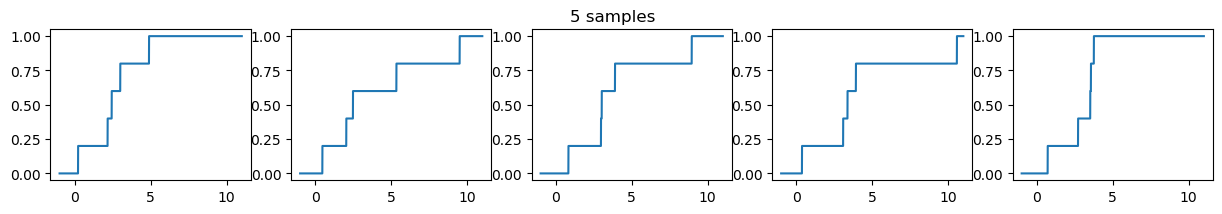

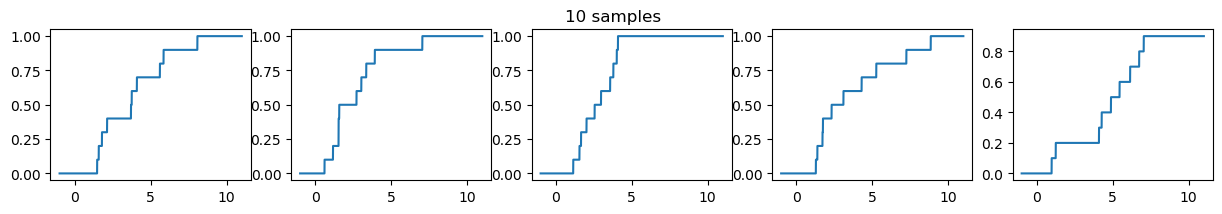

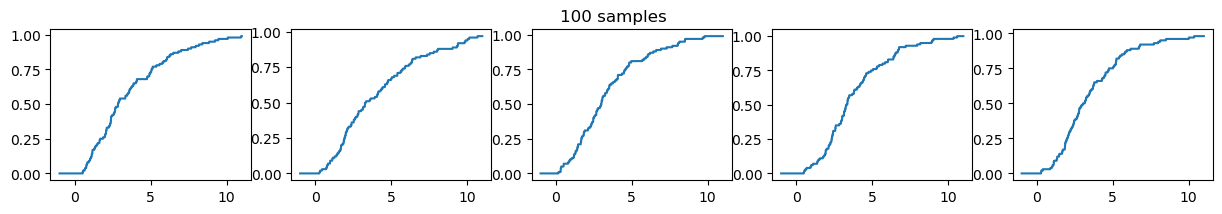

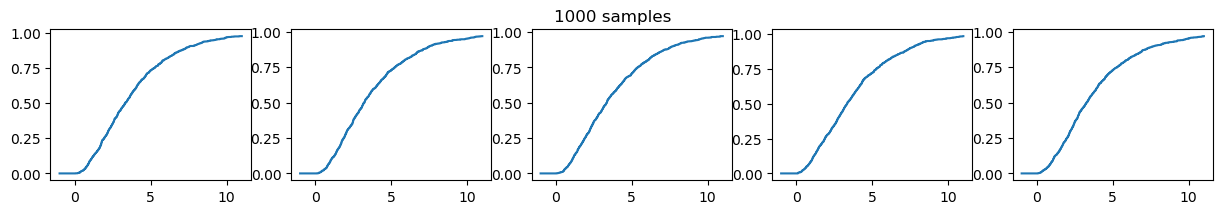

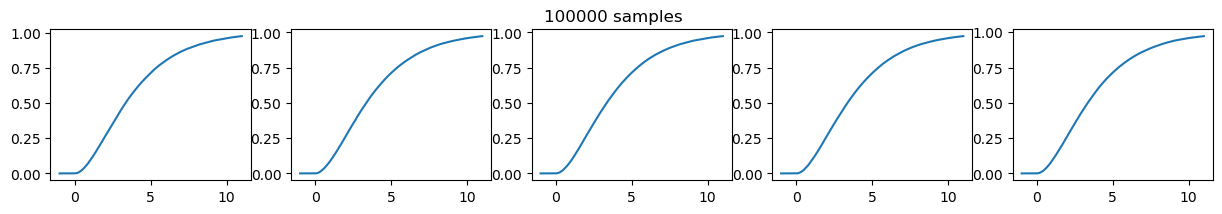

In [25]:
x = np.arange(-1,11, 0.001)
for volume in data:
    fig, ax = plt.subplots(1, 5, figsize=(15, 2), dpi=100)
    fig.suptitle(f"{volume} samples")
    for i in range(len(volumes)):
        y = list(map(lambda e: ecdf(e, data[volume][i]) , x))
        ax[i].plot(x, y)

### Расчёт верхнтх границ разностей каждой пары эмпирических функций распределения

In [26]:
for volume in data:
    for i in range(len(data[volume])-1):
        for j in range(i+1, len(data[volume])):
            xx = np.arange(-1,11, 0.001)
            print(f"{volume:10} samples, sup|F_{i+1} - F_{j+1}| = {max(list(map(lambda x: abs(ecdf(x,data[volume][i])-ecdf(x,data[volume][j])), xx)))}")

         5 samples, sup|F_1 - F_2| = 0.4
         5 samples, sup|F_1 - F_3| = 0.4
         5 samples, sup|F_1 - F_4| = 0.6000000000000001
         5 samples, sup|F_1 - F_5| = 0.4
         5 samples, sup|F_2 - F_3| = 0.39999999999999997
         5 samples, sup|F_2 - F_4| = 0.39999999999999997
         5 samples, sup|F_2 - F_5| = 0.4
         5 samples, sup|F_3 - F_4| = 0.39999999999999997
         5 samples, sup|F_3 - F_5| = 0.4
         5 samples, sup|F_4 - F_5| = 0.4
        10 samples, sup|F_1 - F_2| = 0.4
        10 samples, sup|F_1 - F_3| = 0.30000000000000004
        10 samples, sup|F_1 - F_4| = 0.2
        10 samples, sup|F_1 - F_5| = 0.49999999999999994
        10 samples, sup|F_2 - F_3| = 0.30000000000000004
        10 samples, sup|F_2 - F_4| = 0.30000000000000004
        10 samples, sup|F_2 - F_5| = 0.7
        10 samples, sup|F_3 - F_4| = 0.4
        10 samples, sup|F_3 - F_5| = 0.7
        10 samples, sup|F_4 - F_5| = 0.39999999999999997
       100 samples, sup|F_1 - F_2| = 

### Построение вариациооного ряда и поиск квантилей

In [27]:
alphas = [0.1, 0.5, 0.7]

In [28]:
var = {key: np.array([(sorted(v)) for v in value]) for key, value in data.items()}
print(var[5])

[[ 0.21458197  2.15967123  2.42826354  2.99277131  4.88650833]
 [ 0.46371415  2.03889844  2.47716438  5.33830456  9.50444   ]
 [ 0.82724113  2.97116322  3.0218157   3.89402852  8.94799453]
 [ 0.36990768  3.08048718  3.36739826  3.92071664 10.57175782]
 [ 0.71009743  2.71127769  3.51386672  3.55897453  3.75135815]]


In [29]:
print(var[10])

[[ 1.46989451  1.57544825  1.78619904  2.12448904  3.69859107  3.74786129
   4.08636189  5.60238847  5.84417023  8.07049354]
 [ 0.60566861  1.16260742  1.53015247  1.53704991  1.57300945  2.71134182
   3.02820937  3.35279524  3.91664963  7.04591535]
 [ 1.14409025  1.5545393   1.65957986  2.0196425   2.55354043  2.97594705
   3.57547827  3.78654759  4.01169167  4.08953129]
 [ 1.28455959  1.38216958  1.72018998  1.74983957  2.31987952  3.10011909
   4.29776845  5.26278858  7.24379634  8.84837562]
 [ 0.97195753  1.24124768  4.08916343  4.26696835  4.87797682  5.4456575
   6.14043228  6.73557887  7.03642169 11.62250597]]


In [30]:
for a in alphas:
    print(f"α={a}")
    for key, samples in var.items():
        x_alphas = []
        for sample in samples:
            x_alphas += [sample[int(a*len(sample) + 1)]]
            print(f"{key:6} samples, x_α={x_alphas[-1]}")
        print()
    print()

α=0.1
     5 samples, x_α=2.1596712345304834
     5 samples, x_α=2.038898439324956
     5 samples, x_α=2.9711632167025552
     5 samples, x_α=3.080487179272342
     5 samples, x_α=2.7112776869350492

    10 samples, x_α=1.7861990356336903
    10 samples, x_α=1.5301524744576884
    10 samples, x_α=1.6595798597120994
    10 samples, x_α=1.7201899751667138
    10 samples, x_α=4.089163430647711

   100 samples, x_α=1.0687027519187975
   100 samples, x_α=1.263978732617793
   100 samples, x_α=1.1645331628555422
   100 samples, x_α=1.748776257014068
   100 samples, x_α=1.3356888836334626

  1000 samples, x_α=1.0779469523168792
  1000 samples, x_α=1.063425590739924
  1000 samples, x_α=1.0991935594518507
  1000 samples, x_α=1.040445368126651
  1000 samples, x_α=1.0802929289492627

100000 samples, x_α=1.0661849804255985
100000 samples, x_α=1.0602664968429107
100000 samples, x_α=1.0698366171329778
100000 samples, x_α=1.0699906393799243
100000 samples, x_α=1.0699386008205791


α=0.5
     5 samples

### Проверка реального значения квантиля

In [33]:
def compute_quntile(cdf, a, eps=0.001):
    x = np.arange(-1, 13, eps)
    for xx in x:
        if cdf(xx)<a and cdf(xx+eps)>a:
            return xx+eps

for a in alphas:
    x = np.arange(-1, 13, 0.001)
    print(f"α={a}, x_α={compute_quntile(g.cdf, a)}")

α=0.1, x_α=1.0640000000000018
α=0.5, x_α=3.3570000000000033
α=0.7, x_α=4.879000000000006


### Построение гистограммы частот, полигона частот и сравнение значений с функцией распределения

Красная линия - линия полигона частот, жёлтая - функция распределения

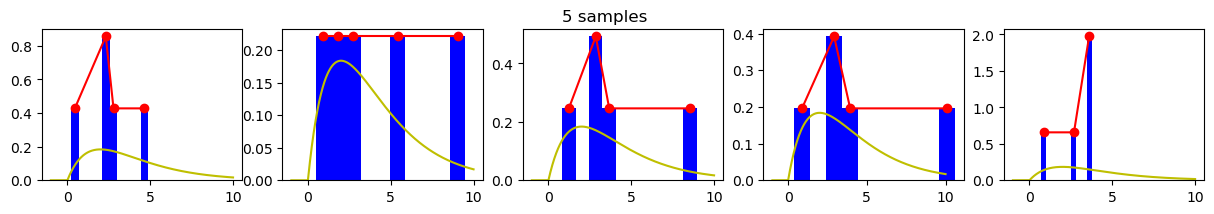

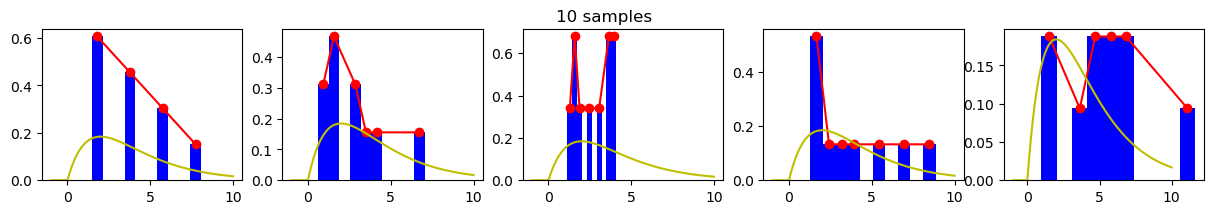

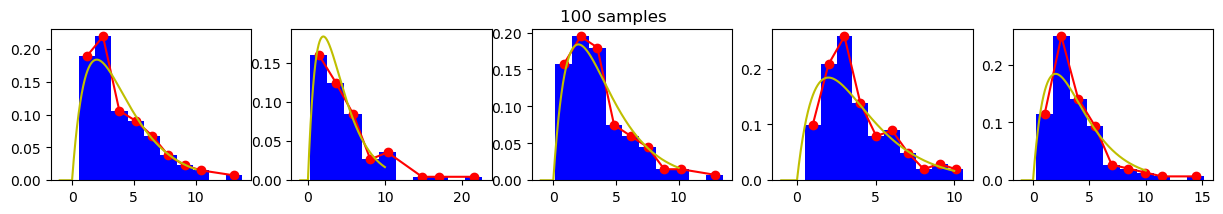

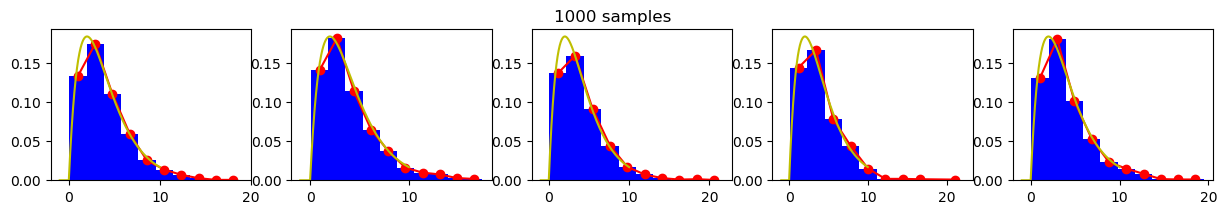

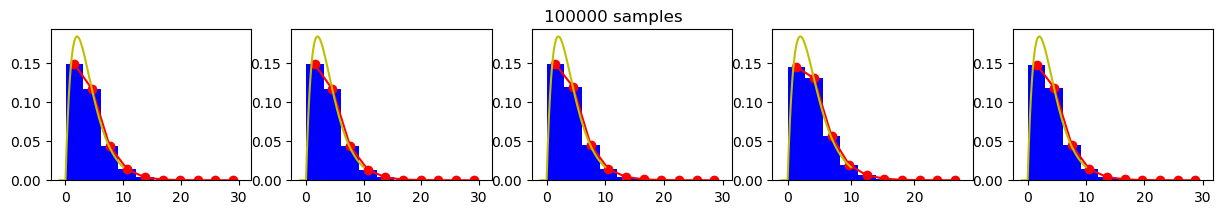

In [35]:
for volume in data:
    fig, ax = plt.subplots(1, 5, figsize=(15, 2), dpi=100)
    fig.suptitle(f"{volume} samples")
    for i in range(len(volumes)):
        counts, bins = np.histogram(data[volume][i])
        ns, bns, _ = ax[i].hist(bins[:-1], bins=bins, weights=counts, density=True, color="b")
        bns = np.array(bns)
        x = bns[:-1] + (bns[1:] - bns[:-1])/2
        x = [x[i] for i in range(len(ns))  if ns[i]!=0 ]
        y = [ns[i] for i in range(len(ns))  if ns[i]!=0 ]
        ax[i].plot(x, y, "-ro")
        x = np.arange(-1, n, 0.001)
        pdf = g.pdf(x)
        ax[i].plot(x, pdf, '-y')
        ax[i].plot   